In [8]:
## 21회 모의고사 
##  2. 통계분석 (50점) 

# 2. 회귀분석 문제. DATA = boston data (연속형 독립변수 1개, 종속변수 1개로 구성된 보스턴 집값 데이터셋)  (총 29점 ) 
# 2-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오 
# 2-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오. 
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산 
# 2-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산

In [ ]:
# !pip install mglearn

In [12]:
# 2. 회귀분석 문제. DATA = boston data (연속형 독립변수 1개, 종속변수 1개로 구성된 보스턴 집값 데이터셋)  (총 29점 ) 
import pandas as pd 
import numpy as np 
# import mglearn

df01 = pd.read_csv("C:/adp/data/BostonHousing.csv")
df01.tail()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.573,6.030,80.8,2.5050,273,21.0,396.90,7.88,11.9


In [17]:
X = df01.drop('MEDV', axis = 1)
y = df01['MEDV']

In [24]:
# 데이터 8:2로 분할 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2022)

In [25]:
# 2-1. 데이터 8:2로 분할하고 선형회귀 적용하시오. 결정계수와 rmse 구하시오 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso

lr = LinearRegression() 
lr.fit(X_train, y_train)

## R2 
print("선형회귀 결정계수 : ", lr.score(X_test,y_test))
print("선형회귀 RMSE : ", np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

선형회귀 결정계수 :  0.6005773464626034
선형회귀 RMSE :  5.343855151460941


In [ ]:
# 선형회귀모델의 테스트모델 검증시, 정확도는 60.05%이며 RMSE값은 약 5.34 입니다.

In [27]:
# 2-2. 데이터 8:2로 분할하고 릿지 회귀 적용하시오. 
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산
alpha = np.arange(0, 1.1, 0.01)

ridge = Ridge(normalize=True) 
param_grid = {'alpha':alpha}
ridge_model = GridSearchCV(ridge, param_grid)
ridge_model.fit(X_train,y_train)

print(ridge_model.best_params_)
print("릿지회귀 결정계수 : ", ridge_model.score(X_test,y_test))
print("릿지회귀 RMSE : ", np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test))))

C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce th

{'alpha': 0.11}
릿지회귀 결정계수 :  0.6158570187036341
릿지회귀 RMSE :  5.240645496143073


C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce th

In [ ]:
# 릿지 회귀분석모델의 알파를 0 ~ 1.1 을 0.01 간격으로 GridSearch 기법으로 탐색하여 최적의 분석모델을 수립하는 알파 0.11를 선별하였습니다.
# alpha=0.11 분석모델의 모델로 테스트모델 검증시,정확도는 61.59%이며 RMSE값은 약 5.24 입니다.

In [30]:
# 2-3. 데이터 8:2로 분할하고 라쏘 회귀 적용하시오.
# alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산
alpha = np.arange(0, 0.5, 0.001)
lasso = Lasso(normalize=True) 
param_grid = {'alpha':alpha}
lasso_model = GridSearchCV(lasso, param_grid)
lasso_model.fit(X_train,y_train)

print(lasso_model.best_params_)
print("라쏘회귀 결정계수 : ", lasso_model.best_estimator_.score(X_test,y_test))
print("라쏘회귀 RMSE : ", np.sqrt(mean_squared_error(y_test, lasso_model.best_estimator_.predict(X_test))))

C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Use

{'alpha': 0.005}
라쏘회귀 결정계수 :  0.602081583694468
라쏘회귀 RMSE :  5.333783103306047


C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To rep

In [ ]:
# 라쏘 회귀분석모델의 알파를 0 ~ 0.5 을 0.001 간격으로 GridSearch 기법으로 탐색하여 최적의 분석모델을 수립하는 알파 0.005를 선별하였습니다.
# alpha=0.005 분석모델의 모델로 테스트모델 검증시,정확도는 60.21%이며 RMSE값은 약 5.33 입니다.

In [ ]:
## alpha=0.11 릿지 회귀분석모델이 정확도는 61.59%로 가장 높으며 RMSE값은 약 5.24로 가장 낮아서 최적의 분석모델로 나타납니다.

In [ ]:
###################################################


In [42]:
# 2. 독립변수 하나 종속변수 하나 소규모 데이터 다항회귀(12점)
# 다항 회귀를 3차까지 적용시켜 계수를 구하고 각 차수별 데이터포인트 스캐터 플롯과 기울기 선을 그리세요. 
# 다항회귀 : https://blog.naver.com/hyemin8670/222370269555

# 2.1 데이터 생성
## 데이터 불러오기 
m = 100
X = 3 * np.random.rand(m,1) - 1.5
y = 3 * X**3  + X**2 + 2*X + 2 + np.random.randn(m,1)  #노이즈 포함

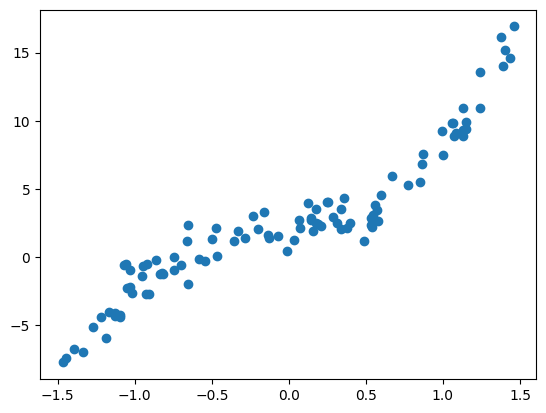

In [47]:
# 데이터 분포 확인
line = np.linspace(-2,2,100, endpoint=False).reshape(-1,1)
plt.plot(X[:,0], y, 'o')

In [51]:
from sklearn.preprocessing import PolynomialFeatures
# degree(몇 차 다항식을 생성할 것인가)
poly_features = PolynomialFeatures(degree=3, include_bias=False) #include_bias=False일 경우, 항(1)을 생성하지 않는다.
# X_poly: 특성 X와 해당 값들의 제곱(degree=2)을 포함한다.
X_poly = poly_features.fit_transform(X)

# 그래프 데이터
X_poly = poly_features.transform(X)
line_poly = poly_features.transform(line)

In [57]:
# LinearRegression을 적용
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)


(array([1.98178954]), array([[1.92766063, 0.98501049, 3.10089087]]))

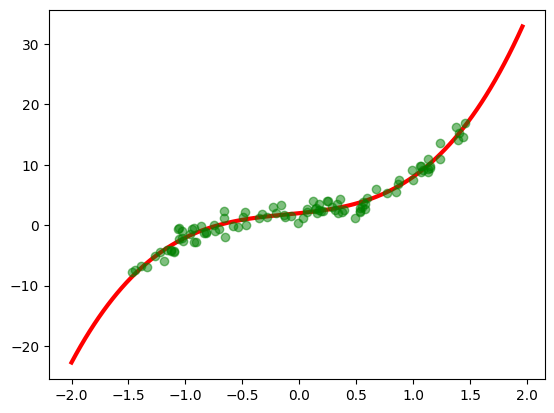

In [60]:
plt.plot(line, lin_reg.predict(line_poly), c='r',linewidth=3) # 회귀선
plt.plot(X,y,'o',c = 'g', alpha=0.5) # 데이터

In [ ]:
####################################################
## 3. ANOVA분석 (9점)
# 변수 3개(하나는 수치형 변수/ 나머지 두 개는 범주형 변수)
# 이원분산분석을 수행하고 통계표를 작성하시오.

# 분산분석은 종속변수(반응변수)에 대해 두 개의 범주형 변수 A,B의 영향을 알아보기 위해 사용되는 검증 방법이다.

# - 가. 상호작용효과 검정에 대한 가설
# 1) 귀무가설 H0: region과 avocado type 간에는 상호작용 효과가 없다. 
# 2) 대립가설 H1: region과 avocado type 간에는 상호작용 효과가 있다. 

# - 나. 주효과 검정에 대한 가설
# 1) 귀무가설 H0: region 종류에 따른 AveragePrice 차이는 존재하지 않는다. 
# 2) 대립가설 H1: region 종류에 따른 AveragePrice 차이는 존재한다.  
# 3) 귀무가설 H0: type 종류에 따른 AveragePrice 차이는 존재하지 않는다. 
# 4) 대립가설 H1: type 종류에 따른 AveragePrice 차이는 존재한다.

In [64]:
# 데이터 생성 / 답을 봐야만 가능??;;;;
avocado = pd.read_csv('C:/adp/data/avocado.csv')
avocado = avocado[["AveragePrice","type","region"]]
avocado = avocado[(avocado['region'] == 'Orlando') | (avocado['region'] == 'Boston' )| (avocado['region'] == 'Chicago')].reset_index(drop=True)
avocado


,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


In [ ]:
# - 가. 상호작용효과 검정에 대한 가설
# 1) 귀무가설 H0: region과 avocado type 간에는 상호작용 효과가 없다. 
# 2) 대립가설 H1: region과 avocado type 간에는 상호작용 효과가 있다. 


In [65]:
## 독립변수 type,region 종속변수 AveragePrice 을 Series로 변경 
AveragePrice = avocado["AveragePrice"]
avocado_type = avocado["type"]
region = avocado["region"]

## 분산분석 수행 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'AveragePrice ~C(avocado_type)*C(region)' 
model = ols(formula, avocado).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(avocado_type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(avocado_type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


In [ ]:
# avocado_type 변수에 대한 p-value는 0.05보다 작으므로, 주효과 검정에서 1)귀무가설을 기각한다. 따라서 avocado_type에 따라 AveragePrice 간 유의미한 차이는 존재한다고 해석할 수 있다. 
# region 변수에 대한 p-value는 0.05보다 작으므로, 주효과 검정에서 1)귀무가설을 기각한다. 따라서 region에 따라 AveragePrice 간 유의미한 차이는 존재한다고 해석할 수 있다. 
# avocado_type:region 변수에 대한 p-value는 0.05보다 작으므로, 주효과 검정에서 1)귀무가설을 기각한다. 따라서 avocado_type와region 상호작용에 따라 AveragePrice 간 유의미한 차이는 존재한다고 해석할 수 있다. 
# > 